In [ ]:
!pip install mediapipe

In [ ]:
!pip install fer

In [ ]:
import os
import random
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import tensorflow as tf
from keras.models import Model
from keras import backend as K
from keras.utils import plot_model
from skimage.io import imread
from PIL import Image, ImageDraw
import cv2 as cv
import math
import h5py
from keras.models import load_model
import json
from google.colab.patches import cv2_imshow
from PIL import Image
from tensorflow.keras.models import load_model
import cv2
from fer import FER
from fer import Video
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import mediapipe as mp
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

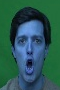

1/1 [==============================] - 0s 252ms/step


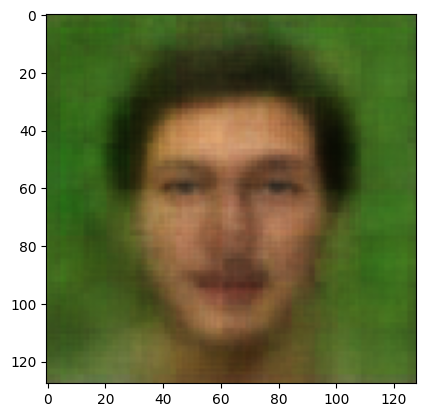

In [ ]:
from tensorflow.keras.models import load_model
import cv2

model=load_model("/content/drive/MyDrive/Multimodal Project/finals/autoencoder_model_100.h5")
img_path = "/content/drive/MyDrive/Multimodal Project/finals/CREMAD/images/1011_IEO_ANG_HI/1011_IEO_ANG_HI.flv_frame_58.jpg"

x = 30  # x-coordinate of the top-left corner of the region
y = 10  # y-coordinate of the top-left corner of the region
w = 60  # width of the region
h = 90  # height of the region

img = cv2.imread(img_path,cv2.COLOR_BGR2RGB)
#plt.imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color format form BGR to RGB (OpenCV default is BGR).

crop_img = img[y:y+h, x:x+w]
cv2_imshow(crop_img)
#plt.imshow(crop_img)

img = np.array(crop_img)/255
#plt.imshow(img)

img = cv.resize(img, (128, 128))
#plt.imshow(img)

img_array = np.expand_dims(img, axis=0)
image_pred = model.predict(img_array)
image = image_pred[0]
plt.imshow(image)

In [ ]:
output_folder = '/content/drive/MyDrive/Multimodal Project/finals/output_images_100_epoch_new'
i=0
model=load_model("/content/drive/MyDrive/Multimodal Project/finals/autoencoder_model_100.h5")

for file_name in os.listdir("/content/drive/MyDrive/Multimodal Project/finals/CREMAD/images/1011_IEO_ANG_HI"):
    img_path = os.path.join("/content/drive/MyDrive/Multimodal Project/finals/CREMAD/images/1011_IEO_ANG_HI", file_name)

    x = 30  # x-coordinate of the top-left corner of the region
    y = 10  # y-coordinate of the top-left corner of the region
    w = 60  # width of the region
    h = 90  # height of the region

    img = cv2.imread(img_path,cv2.COLOR_BGR2RGB)
    #plt.imshow(img)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color format form BGR to RGB (OpenCV default is BGR).

    crop_img = img[y:y+h, x:x+w]
    #cv2_imshow(crop_img)
    #plt.imshow(crop_img)

    img = np.array(crop_img)/255
    #plt.imshow(img)

    img = cv.resize(img, (128, 128))
    #plt.imshow(img)

    img_array = np.expand_dims(img, axis=0)
    image_pred = model.predict(img_array)
    image = image_pred[0]
    #plt.imshow(image)

    output_path = os.path.join(output_folder, f"image_{i}.png")
    i+=1

    plt.imsave(output_path, image)


In [ ]:
output_folder = '/content/drive/MyDrive/Multimodal Project/finals/output_images_100_epoch_new'
video_name = 'result_video_100_epoch_new.avi'

i = 0

img = cv2.imread(output_folder+"/image_0.png")

height,width,layers=img.shape
video = cv2.VideoWriter(video_name, 0, 30, (width, height))

for i in range(102):

  img = cv2.imread(output_folder+"/image_"+str(i)+".png")
  video.write(img)


In [ ]:
emotion_detecter = FER(mtcnn=True)

path = "./result_video_100_epoch_new.avi"

video = Video(path)

result = video.analyze(emotion_detecter,display=False)
emotions_df = video.to_pandas(result)

df = emotions_df[['angry','disgust','fear','happy','sad','surprise','neutral']]
sums = df.sum()

# Get the column name with the maximum sum
max_column = sums.idxmax()
max_value = sums[max_column]

print(f"The column with the maximum sum is '{max_column}' with a sum of {max_value}.")

sorted_sums = sums.sort_values(ascending=False)

print("Columns sorted by sum:")
for column, value in sorted_sums.items():
    print(f"{column}: {value}")

In [ ]:
# output_folder = '/content/drive/MyDrive/Multimodal Project/finals/output_images'
i=0
model=load_model("/content/drive/MyDrive/Multimodal Project/finals/autoencoder_model_100.h5")

for f in os.listdir("/content/drive/MyDrive/Multimodal Project/test_data_video"):
    folder = os.path.join("/content/drive/MyDrive/Multimodal Project/test_data_video", f)
    #print(f)

    for fns in os.listdir(folder):
      filename = os.path.join(folder, fns)
      #/content/drive/MyDrive/Multimodal Project/finals/CREMAD/images/1001_IEO_SAD_HI/1001_IEO_SAD_HI.flv_frame_0.jpg

      # x = 30  # x-coordinate of the top-left corner of the region
      # y = 10  # y-coordinate of the top-left corner of the region
      # w = 60  # width of the region
      # h = 90  # height of the region
      x = 25  # x-coordinate of the top-left corner of the region
      y = 5  # y-coordinate of the top-left corner of the region
      w = 70  # width of the region
      h = 100  # height of the region

      img = cv2.imread(filename,cv2.COLOR_BGR2RGB)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color format form BGR to RGB (OpenCV default is BGR).

      crop_img = img[y:y+h, x:x+w]
      img = np.array(crop_img)/255
      img = cv.resize(img, (128, 128))

      img_array = np.expand_dims(img, axis=0)
      image_pred = model.predict(img_array)
      image = image_pred[0]


      directory_name = '/content/drive/MyDrive/Multimodal Project/finals/output_100_epoch/'+f
      if not os.path.exists(directory_name):
          os.makedirs(directory_name)

      fn = fns.replace('.','_')+".png"

      #print(folder,filename,fn,directory_name)

      op = os.path.join(directory_name, fn)

      #print(op)
      height,width,layers=image.shape
      plt.imsave(op,image)
      i+=1


In [ ]:
emotion_detecter = FER(mtcnn=True)

In [ ]:
output_folder = '/content/drive/MyDrive/Multimodal Project/finals/output_100_epoch'

for folders in os.listdir(output_folder):
    folder = os.path.join(output_folder, folders)

    #print(folder)
    directory_name = '/content/drive/MyDrive/Multimodal Project/finals/output_videos_100_epoch/'+folders+'.avi'

    #print(directory_name)

    #height,width,layers=img.shape
    video = cv2.VideoWriter(directory_name, 0, 30, (width, height))

    for filenames in os.listdir(folder):
      filename = os.path.join(folder, filenames)
      #print(filename)
      img = cv2.imread(filename)
      video.write(img)



In [ ]:
output_folder = '/content/drive/MyDrive/Multimodal Project/finals/output_videos_100_epoch'

y_true=[]
y_pred=[]

for folders in os.listdir(output_folder):
    folder = os.path.join(output_folder, folders)
    emo = folders.split("_")[2]
    y_true.append(emo)

    video_name = folder+".avi"
    video = Video(folder)
    result = video.analyze(emotion_detecter,display=False)
    emotions_df = video.to_pandas(result)


    df = emotions_df[['angry','happy','sad','neutral','disgust']]
    sums = df.sum()
    max_column = sums.idxmax()
    max_value = sums[max_column]

    y_pred.append(max_column)


In [ ]:
print(y_true)
print(y_pred)

['SAD', 'HAP', 'SAD', 'ANG', 'SAD']
['sad', 'happy', 'sad', 'happy']


In [ ]:
output_folder = '/content/drive/MyDrive/Multimodal Project/finals/output_videos_100_epoch'

y_true=[]
y_pred=[]

for folders in os.listdir(output_folder):
    folder = os.path.join(output_folder, folders)
    emo = folders.split("_")[2]
    y_true.append(emo)

    video_name = folder+".avi"
    video = Video(folder)
    result = video.analyze(emotion_detecter,display=False)
    emotions_df = video.to_pandas(result)


    df = emotions_df[['angry','happy','sad','neutral','disgust']]
    # Find the maximum value for each row and its corresponding label
    df['max_value'] = df.max(axis=1)
    df['max_label'] = df.idxmax(axis=1)

    # Determine the label with the highest frequency of being the maximum
    max_label_frequency = df['max_label'].value_counts().idxmax()

    # Print the maximum value for each row and its corresponding label
    print("Maximum value and label for each row:")
    print(df[['max_value', 'max_label']])

    # Print the label with the highest frequency of being the maximum
    print("\nLabel with the highest frequency of being the maximum:", max_label_frequency)

    y_pred.append(max_label_frequency)




In [ ]:
print(y_true)
print(y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_true)))
plt.xticks(tick_marks, sorted(set(y_true)))
plt.yticks(tick_marks, sorted(set(y_true)))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

plt.show()

In [ ]:
id, frames = [], []

for file_name in os.listdir("/content/drive/MyDrive/Multimodal Project/finals/CREMAD/videos"):
    if file_name.endswith('.flv') or file_name.endswith('.mp4'):
    #print(file_name)
      identity = file_name.split("_")[0]
      emo = file_name.split("_")[2]
      video_path = os.path.join("/content/drive/MyDrive/Multimodal Project/finals/CREMAD/videos", file_name)
      cap = cv2.VideoCapture(video_path)
      while cap.isOpened():
          ret, frame = cap.read()
          if not ret:
              break
          loc = os.path.join("Output_speaker_identification", f"frame_{identity}_{emo}.jpg")
          frame = cv2.resize(frame, (64, 64))
          id.append(identity)
          frames.append(np.array(img_to_array(frame) / 255.0))
          break

In [ ]:
# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(frames, id, test_size=0.4, random_state=42, stratify=id)

from sklearn.preprocessing import LabelEncoder

# Assuming train_labels and val_labels contain string labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.fit_transform(val_labels)

# Define model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape = (64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(91, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(np.array(train_images), train_labels_encoded, batch_size=32)
val_generator = val_datagen.flow(np.array(val_images),val_labels_encoded, batch_size=32)
# Train the model
history = model.fit(train_generator, epochs=20,
    validation_data=val_generator)


In [ ]:
new_image_path = './result_video_100_epoch.avi'
cap = cv2.VideoCapture(new_image_path)
while cap.isOpened():
    ret, new_image = cap.read()
    break
new_image = cv2.resize(new_image, (64, 64))
# Convert the image to an array and preprocess it
new_image_array = img_to_array(new_image) / 255.0  # Normalize pixel value # Normalize pixel values
new_image_array = np.expand_dims(new_image_array, axis=0)

# Make predictions
predictions = model.predict(new_image_array)

predicted_person = label_encoder.inverse_transform(np.argmax(predictions, axis=1))[0]

print("Predicted Person:", predicted_person)